# Linear Algebra and Machine Learning Practice (Day 2)

## 목차 (Table of Contents)

**준비 과정**
- [라이브러리 설치 및 불러오기](#준비하기-라이브러리-설치-및-불러오기)

**실습 (Practice)**
1. [행렬 곱셈과 활용](#1-행렬-곱셈과-활용)
2. [역행렬과 희소 행렬](#2-역행렬과-희소-행렬)
3. [K-means의 한계와 Feature Transformation](#3-K-means의-한계와-Feature-Transformation)
4. [최소제곱 데이터 피팅 (Least Squares Data Fitting)](#4-최소제곱-데이터-피팅-least-squares-data-fitting)

## 준비하기: 라이브러리 설치 및 불러오기

In [1]:
# 라이브러리 설치
import subprocess
import sys

def install_if_not_exists(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# 모든 실습에 필요한 라이브러리 목록
required_packages = ["numpy", "matplotlib", "scikit-learn", "scipy"]
for package in required_packages:
    install_if_not_exists(package)

# 라이브러리 불러오기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import scipy.sparse
import time

# 전체 실습의 재현성을 위해 랜덤 시드를 고정합니다.
np.random.seed(0)

## 1. 행렬 곱셈과 활용

### 1.1. 행렬 곱셈 (Matrix-Matrix Multiplication)
두 행렬의 곱셈 $C = AB$는 첫 번째 행렬 $A$의 열 개수와 두 번째 행렬 $B$의 행 개수가 같아야 가능합니다.
(m, p) 크기 행렬과 (p, n) 크기 행렬을 곱하면 결과는 (m, n) 크기의 행렬이 됩니다.
행렬 곱은 선형 변환의 연속(합성)을 의미하며, 교환 법칙($AB \neq BA$)이 성립하지 않는다는 특징이 있습니다.

In [2]:
# 실습: 두 행렬의 값을 바꿔보거나, 행렬의 크기를 바꿔서 곱셈을 시도해보세요.
# (m, p) x (p, n) 크기의 행렬 곱셈
A_mul = np.array([
    [1, 2, 3],
    [4, 5, 6]
])
B_mul = np.array([
    [10, 11],
    [20, 21],
    [30, 31]
])

# 행렬 곱셈. A_mul의 열 수(3)와 B_mul의 행 수(3)가 같아야 합니다.
C_mul = A_mul @ B_mul  # 결과는 (2, 2) 행렬

print("행렬 A (2x3):\n", A_mul)
print("행렬 B (3x2):\n", B_mul)
print("-" * 20)
print("행렬 곱 AB:\n", C_mul)
print(f"AB의 크기: {C_mul.shape}")

행렬 A (2x3):
 [[1 2 3]
 [4 5 6]]
행렬 B (3x2):
 [[10 11]
 [20 21]
 [30 31]]
--------------------
행렬 곱 AB:
 [[140 146]
 [320 335]]
AB의 크기: (2, 2)


### 1.2. 기하 변환 (Geometric Transformations)
행렬 곱셈은 벡터를 특정 방식으로 변환하는 강력한 도구입니다. 예를 들어, 2D 벡터를 $\theta$만큼 회전시키는 변환은 아래와 같은 회전 행렬 $R$을 곱하여 수행할 수 있습니다.

$$
R = \begin{bmatrix}
 \cos(\theta) & -\sin(\theta) \\
 \sin(\theta) & \cos(\theta)
 \end{bmatrix}
$$

변환된 벡터 = R @ 원본 벡터

In [3]:
# 실습: 벡터 v의 값이나, 회전 각도 theta를 바꿔서 변환 결과를 확인해보세요.
# 변환할 2D 벡터를 정의합니다.
v = np.array([1, 0]) # x축 방향의 단위 벡터

# 45도 회전을 위한 변환 행렬을 생성합니다.
theta = np.radians(45)
R_mat = np.array([[np.cos(theta), -np.sin(theta)],
              [np.sin(theta),  np.cos(theta)]])

# 회전 변환을 적용합니다.
v_rotated = R_mat @ v

print("원본 벡터 v:", v)
print("45도 회전 행렬 R:\n", np.round(R_mat, 2))
print("회전된 벡터 v_rotated:", np.round(v_rotated, 2))

원본 벡터 v: [1 0]
45도 회전 행렬 R:
 [[ 0.71 -0.71]
 [ 0.71  0.71]]
회전된 벡터 v_rotated: [0.71 0.71]


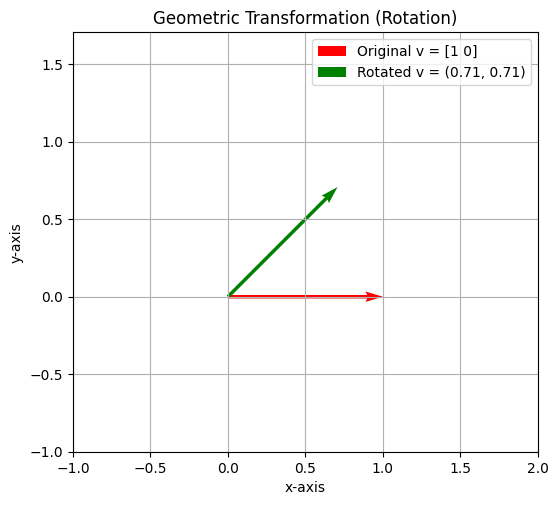

In [4]:
# 시각화
origin = np.array([0, 0])

all_points_x_rot = [0, v[0], v_rotated[0]]
all_points_y_rot = [0, v[1], v_rotated[1]]

plt.figure(figsize=(6,6))
plt.quiver(*origin, *v, angles='xy', scale_units='xy', scale=1, color='r', label=f'Original v = {v}')
plt.quiver(*origin, *v_rotated, angles='xy', scale_units='xy', scale=1, color='g', label=f'Rotated v = ({v_rotated[0]:.2f}, {v_rotated[1]:.2f})')

# 동적으로 계산된 범위에 여백을 주어 x, y축 범위를 설정합니다.
plt.xlim(min(all_points_x_rot) - 1, max(all_points_x_rot) + 1)
plt.ylim(min(all_points_y_rot) - 1, max(all_points_y_rot) + 1)

plt.title('Geometric Transformation (Rotation)')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid()
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 1.3. 선형 변환의 합성 (Composition)
두 가지 선형 변환을 연속으로 적용하는 것은, 각 변환에 해당하는 두 행렬을 먼저 곱하여 얻은 합성 행렬을 한 번 적용하는 것과 같습니다.
예를 들어, 30도 회전 후 60도 회전을 적용하는 것은, 90도 회전 행렬을 한 번 적용하는 것과 동일합니다.

$(R_{60} @ R_{30}) @ v = R_{60} @ (R_{30} @ v)$

In [5]:
# 실습: 벡터 v_comp의 값이나, 두 회전 각도를 바꿔보며 결과를 확인해보세요.
# 원본 벡터를 정의합니다.
v_comp = np.array([2, 1])

# 30도 회전 변환
theta_30 = np.radians(30)
R_30 = np.array([[np.cos(theta_30), -np.sin(theta_30)],
                 [np.sin(theta_30),  np.cos(theta_30)]])

# 60도 회전 변환
theta_60 = np.radians(60)
R_60 = np.array([[np.cos(theta_60), -np.sin(theta_60)],
                 [np.sin(theta_60),  np.cos(theta_60)]])

# 방법 1: 변환을 순차적으로 적용합니다 (30도 -> 60도).
v_rotated_seq = R_60 @ (R_30 @ v_comp)

# 방법 2: 변환 행렬을 먼저 곱하여 합성한 후, 한 번에 적용합니다.
R_90 = R_60 @ R_30
v_rotated_combined = R_90 @ v_comp

print("원본 벡터:", v_comp)
print("-" * 20)
print(f"순차 변환 결과 (30도 -> 60도):\n", np.round(v_rotated_seq, 2))
print(f"합성 변환 결과 (90도):\n", np.round(v_rotated_combined, 2))

원본 벡터: [2 1]
--------------------
순차 변환 결과 (30도 -> 60도):
 [-1.  2.]
합성 변환 결과 (90도):
 [-1.  2.]


### 1.4. 벡터의 외적 (Outer Product)

두 벡터 $\mathbf{a}$ (크기 $m$)와 $\mathbf{b}$ (크기 $n$)의 외적(Outer Product)은 $\mathbf{a} \otimes \mathbf{b}$ 또는 $\mathbf{a} \mathbf{b}^T$ 로 표기하며, 그 결과는 $m \times n$ 크기의 행렬이 됩니다.

벡터의 외적은 행렬 곱셈 연산으로 이해할 수 있습니다. 외적을 계산할 때, $m$차원 열벡터 $\mathbf{a}$는 $m \times 1$ 행렬로, $n$차원 열벡터 $\mathbf{b}$는 전치(transpose)를 통해 $1 \times n$ 행렬인 $\mathbf{b}^T$로 변환하여 사용합니다.

행렬 곱셈의 기본 규칙에 따라, $(m \times 1)$ 행렬과 $(1 \times n)$ 행렬의 곱셈은 안쪽 차원(1)이 맞아 떨어지므로 계산이 가능하며, 결과적으로 바깥쪽 차원인 $m \times n$ 크기의 행렬이 생성됩니다.

$$
\mathbf{a} \otimes \mathbf{b} = \mathbf{a} \mathbf{b}^T =
\underbrace{
\begin{bmatrix}
a_1 \\
a_2 \\
\vdots \\
a_m
\end{bmatrix}
}_{\text{m x 1}}
\underbrace{
\begin{bmatrix}
b_1 & b_2 & \cdots & b_n
\end{bmatrix}
}_{\text{1 x n}}
=
\underbrace{
\begin{bmatrix}
a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
\vdots & \vdots & \ddots & \vdots \\
a_m b_1 & a_m b_2 & \cdots & a_m b_n
\end{bmatrix}
}_{\text{m x n}}
$$

In [6]:
# 실습: a_vec, b_vec의 값이나 크기를 바꿔보며 외적의 결과가 어떻게 변하는지 확인해보세요.
a_vec = np.array([1, 2, 3])
b_vec = np.array([10, 20])

# np.outer() 함수를 사용하여 두 벡터의 외적을 계산합니다.
outer_product = np.outer(a_vec, b_vec)

print("벡터 a:", a_vec)
print("벡터 b:", b_vec)
print("-" * 20)
print("a와 b의 외적 (np.outer(a,b)):\n", outer_product)
print(f"외적 행렬의 크기: {outer_product.shape}")

벡터 a: [1 2 3]
벡터 b: [10 20]
--------------------
a와 b의 외적 (np.outer(a,b)):
 [[10 20]
 [20 40]
 [30 60]]
외적 행렬의 크기: (3, 2)


## 2. 역행렬과 희소 행렬

### 2.1. 역행렬 (Matrix Inverse)
어떤 정방 행렬(square matrix) $A$에 대해, 곱했을 때 단위 행렬($I$)이 되는 행렬 $B$가 존재한다면, $B$를 $A$의 역행렬(inverse matrix)이라 부르고 $A^{-1}$로 표기합니다.

$A @ A^{-1} = A^{-1} @ A = I$

역행렬은 어떤 변환을 되돌리는 변환에 해당하며, 연립 방정식을 푸는 데 핵심적인 역할을 합니다.
모든 정방 행렬이 역행렬을 갖는 것은 아닙니다.

- np.linalg.inv() 함수로 역행렬을 계산할 수 있습니다.

In [7]:
# 실습: 아래 행렬 A_inv_source의 값을 바꿔보며 역행렬을 계산해보세요.
# 역행렬을 계산할 2x2 정방 행렬 정의
A_inv_source = np.array([
    [1, 1],
    [1, 2]
])

# 역행렬 계산
try:
    A_inverse = np.linalg.inv(A_inv_source)
    print("원본 행렬 A:\n", A_inv_source)
    print("-" * 20)
    print("A의 역행렬 A^{-1}:\n", A_inverse)
    print("-" * 20)

    # A @ A^{-1}가 단위 행렬인지 확인 (부동소수점 오차를 고려)
    identity_check = A_inv_source @ A_inverse
    print("A @ A^{-1} 결과:\n", identity_check)

    # np.allclose()를 이용한 단위 행렬 검증
    is_identity = np.allclose(identity_check, np.identity(2))
    print(f"\n결과가 단위 행렬과 일치합니까? -> {is_identity}")

except np.linalg.LinAlgError as e:
    print("오류:", e)
    print("이 행렬은 역행렬을 가지지 않습니다 (특이 행렬).")

원본 행렬 A:
 [[1 1]
 [1 2]]
--------------------
A의 역행렬 A^{-1}:
 [[ 2. -1.]
 [-1.  1.]]
--------------------
A @ A^{-1} 결과:
 [[1. 0.]
 [0. 1.]]

결과가 단위 행렬과 일치합니까? -> True


### 2.2. 역행렬 계산 시도와 특이 행렬
역행렬이 존재하지 않는 특이 행렬(Singular Matrix)에 np.linalg.inv()를 사용하면 LinAlgError가 발생합니다.

In [8]:
# 실습: 특이 행렬에 역행렬 계산을 시도하면 LinAlgError가 발생하는 것을 확인합니다.
singular_matrix = np.array([
    [1, 2],
    [2, 4]
])

print("특이 행렬 B:\n", singular_matrix)
print("-" * 20)

# 역행렬 계산 시도
try:
    B_inverse = np.linalg.inv(singular_matrix)
    print("B의 역행렬:\n", B_inverse)
except np.linalg.LinAlgError as e:
    print("np.linalg.inv(B) 실행 시 오류 발생:")
    print(f"-> {e}")

특이 행렬 B:
 [[1 2]
 [2 4]]
--------------------
np.linalg.inv(B) 실행 시 오류 발생:
-> Singular matrix


### 2.3. 희소 행렬(Sparse Matrix) 연산과 성능 비교
Day 1에서 희소 벡터(Sparse Vector)의 개념과 장점을 확인했습니다. 이러한 개념은 2차원 행렬(Sparse Matrix)로 확장될 때, 특히 데이터의 차원이 매우 커질 때 그 진가를 발휘합니다.
희소 행렬은 0이 아닌 값들만 저장하여 메모리를 절약하고, 0을 제외한 요소들만 계산에 포함시켜 연산 속도를 비약적으로 향상시킵니다.

여기서는 세 가지 주요 연산에 대해 일반 행렬과 희소 행렬의 성능을 비교해봅니다.

In [9]:
# 희소 행렬 연산 성능 비교를 위한 대규모 행렬 생성
# 실습: 행렬의 크기(n_dim)나 밀도(density)를 바꿔보며 속도 차이를 확인해보세요.
n_dim = 1000
density = 0.001 # 0.1%

# Scipy의 random 함수를 사용해 직접 희소 행렬을 생성합니다.
# CSR(Compressed Sparse Row) 포맷은 행(row) 기반 연산에 유리하여 범용적으로 사용됩니다.
sparse_m1 = scipy.sparse.random(n_dim, n_dim, density=density, format='csr')
sparse_m2 = scipy.sparse.random(n_dim, n_dim, density=density, format='csr')
v = np.random.rand(n_dim) # 선형 시스템 풀이에 사용할 벡터

# 랜덤 생성 시 발생할 수 있는 전부 0인 행/열을 없애 특이 행렬이 되는 것을 방지합니다.
identity = scipy.sparse.identity(n_dim, format='csr')
sparse_m1 += identity
sparse_m2 += identity

# 비교를 위해 일반 행렬(dense matrix)로도 변환합니다.
dense_m1 = sparse_m1.toarray()
dense_m2 = sparse_m2.toarray()

#### 행렬-행렬 덧셈 (Matrix-Matrix Addition)
희소 행렬 간의 덧셈은 0이 아닌 요소들의 위치를 정렬하고 값을 더하는 방식으로 이루어집니다.

In [10]:
# 일반 행렬 덧셈
start_time = time.time()
_ = dense_m1 + dense_m2
dense_time = time.time() - start_time
print(f"일반 행렬 소요 시간: {dense_time:.6f} 초")

# 희소 행렬 덧셈
start_time = time.time()
_ = sparse_m1 + sparse_m2
sparse_time = time.time() - start_time
print(f"희소 행렬 소요 시간: {sparse_time:.6f} 초")

if sparse_time > 0 and dense_time > sparse_time:
    print(f"-> 희소 행렬이 약 {dense_time / sparse_time:.2f}배 더 빠릅니다.\n")
else:
    print("-> 속도 차이가 미미합니다.\n")

일반 행렬 소요 시간: 0.005077 초
희소 행렬 소요 시간: 0.000834 초
-> 희소 행렬이 약 6.09배 더 빠릅니다.



#### 행렬-행렬 곱셈 (Matrix-Matrix Multiplication)

In [11]:
# 일반 행렬 곱셈
start_time = time.time()
_ = dense_m1 @ dense_m2
dense_time = time.time() - start_time
print(f"일반 행렬 소요 시간: {dense_time:.6f} 초")

# 희소 행렬 곱셈
start_time = time.time()
_ = sparse_m1 @ sparse_m2
sparse_time = time.time() - start_time
print(f"희소 행렬 소요 시간: {sparse_time:.6f} 초")

if sparse_time > 0 and dense_time > sparse_time:
    print(f"-> 희소 행렬이 약 {dense_time / sparse_time:.2f}배 더 빠릅니다.\n")
else:
    print("-> 속도 차이가 미미합니다.\n")

일반 행렬 소요 시간: 0.082576 초
희소 행렬 소요 시간: 0.000868 초
-> 희소 행렬이 약 95.12배 더 빠릅니다.



#### 선형 시스템 풀이 (Solving Linear Systems)
수치 연산에서 $Ax=b$ 형태의 선형 시스템을 푸는 것은 매우 기본적인 연산입니다.
희소 행렬에서는 scipy.sparse.linalg.spsolve 함수를 사용하여 이 문제를 매우 효율적으로 해결할 수 있습니다.
일반 행렬의 np.linalg.solve와 희소 행렬의 spsolve 성능을 비교해 봅니다.

In [12]:
# 일반 행렬: np.linalg.solve 사용
try:
    print("일반 행렬: np.linalg.solve(A, b) 사용")
    start_time = time.time()
    # dense_m1 @ x = v 를 만족하는 x를 찾습니다.
    _ = np.linalg.solve(dense_m1, v)
    dense_time = time.time() - start_time
    print(f"일반 행렬 소요 시간: {dense_time:.6f} 초")
except np.linalg.LinAlgError:
    dense_time = float('inf') # 계산 실패 시 무한대로 설정
    print("일반 행렬은 특이 행렬이거나 계산에 실패했습니다.")

# 희소 행렬: spsolve를 이용해 선형 시스템 풀이
print("\n희소 행렬: spsolve(A, b) 사용")
start_time = time.time()
# spsolve는 내부적으로 CSC 포맷을 선호하지만, CSR 입력도 효율적으로 처리합니다.
_ = scipy.sparse.linalg.spsolve(sparse_m1, v)
sparse_time = time.time() - start_time
print(f"희소 행렬 소요 시간: {sparse_time:.6f} 초")

if dense_time != float('inf') and sparse_time > 0 and dense_time > sparse_time:
    print(f"\n-> spsolve를 사용한 희소 행렬 연산이 약 {dense_time / sparse_time:.2f}배 더 빠릅니다.")
else:
    print("\n-> spsolve를 사용한 희소 행렬 연산이 압도적으로 빠릅니다.")

일반 행렬: np.linalg.solve(A, b) 사용
일반 행렬 소요 시간: 0.051120 초

희소 행렬: spsolve(A, b) 사용
희소 행렬 소요 시간: 0.002034 초

-> spsolve를 사용한 희소 행렬 연산이 약 25.13배 더 빠릅니다.


## 3. K-means의 한계와 Feature Transformation
K-means는 군집이 구형(spherical)이며, 중심점으로부터의 거리로 잘 구분될 것을 가정합니다.
이 가정이 깨지는 데이터에서는 잘 동작하지 않습니다. 이 한계를 확인하고, Feature Transformation을 통해 해결해봅니다.

### 3.1. 실패 사례: 동심원 데이터에 K-means 적용
먼저, K-means가 잘 처리하지 못하는 동심원 데이터를 인위적으로 생성합니다.
두 원의 반지름 차이가 크더라도, 직교 좌표계에서는 거리 기반의 K-means가 두 원을 제대로 분리하지 못합니다.

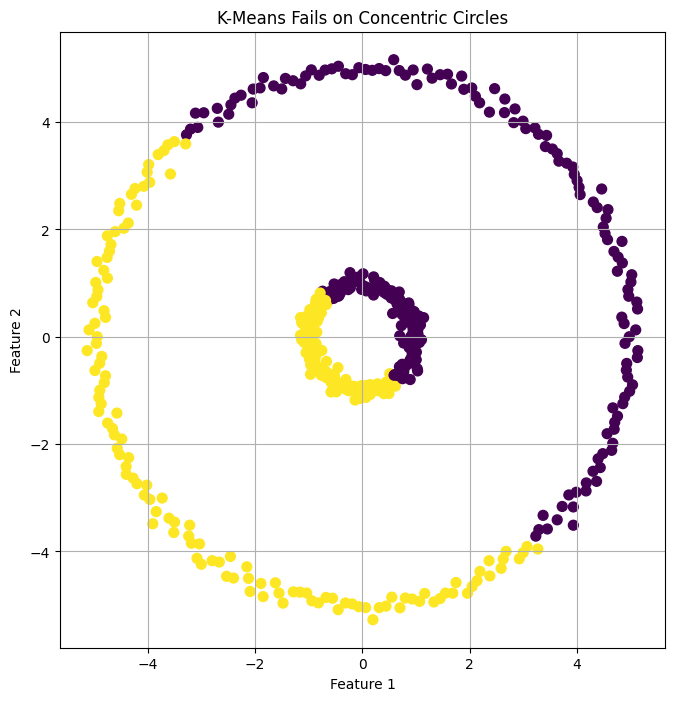

In [13]:
# 실습: 두 원의 반지름(radius1, radius2)이나 클러스터 개수(n_clusters)를 바꿔보며 결과가 어떻게 달라지는지 관찰해보세요.
n_points_per_circle = 250
radius1 = 1.0
radius2 = 5.0

# 원 1 (반지름=radius1)
theta1 = np.linspace(0, 2 * np.pi, n_points_per_circle, endpoint=False)
r1 = radius1 + np.random.randn(n_points_per_circle) * 0.1
x1 = r1 * np.cos(theta1)
y1 = r1 * np.sin(theta1)

# 원 2 (반지름=radius2)
theta2 = np.linspace(0, 2 * np.pi, n_points_per_circle, endpoint=False)
r2 = radius2 + np.random.randn(n_points_per_circle) * 0.1
x2 = r2 * np.cos(theta2)
y2 = r2 * np.sin(theta2)

# 데이터를 합칩니다.
X_circles = np.vstack((np.hstack((x1, x2)), np.hstack((y1, y2)))).T

# 원본 데이터에 K-means 적용
kmeans_fail = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0)
y_kmeans_fail = kmeans_fail.fit_predict(X_circles)

plt.figure(figsize=(8, 8))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_fail, s=50, cmap='viridis')
plt.title('K-Means Fails on Concentric Circles')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

### 3.2. Feature Transformation
데이터의 표현 방식을 바꾸어 K-means가 인식할 수 있는 형태로 만들어줍니다. 기존의 (x, y) 직교 좌표계를 거리(r)와 각도($\theta$)를 나타내는 극 좌표계로 변환합니다.

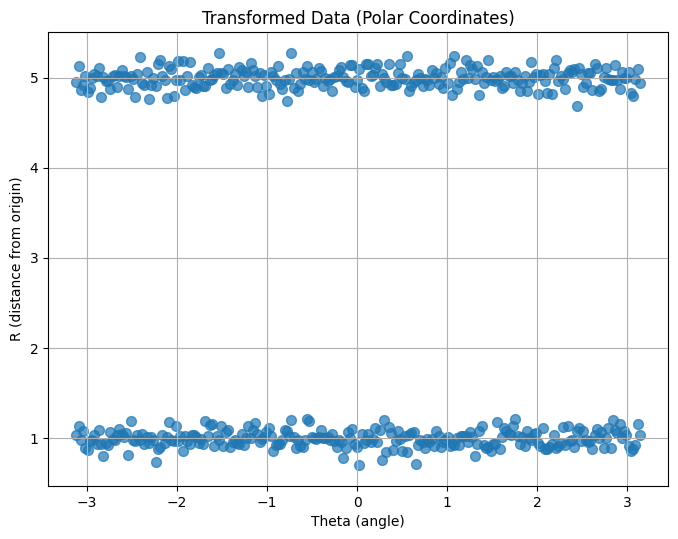

In [14]:
# 피처 변환: 직교 좌표계 -> 극 좌표계
r_polar = np.sqrt(X_circles[:, 0] ** 2 + X_circles[:, 1] ** 2)
theta_polar = np.arctan2(X_circles[:, 1], X_circles[:, 0])

# 변환된 데이터를 시각화하여 구조를 확인합니다.
plt.figure(figsize=(8, 8))
plt.scatter(theta_polar, r_polar, s=50, alpha=0.7)
plt.title('Transformed Data (Polar Coordinates)')
plt.xlabel('Theta (angle)')
plt.ylabel('R (distance from origin)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

### 3.3. 변환된 2D 공간에서 K-means 적용 및 시각화
극 좌표계로 변환된 데이터는 (theta, r)로 이루어진 2D 공간에서 두 군집이 선형적으로 잘 분리되는 모습을 보입니다.
이제 이 변환된 (theta, r) 2D 공간에 K-means를 적용하여 두 군집을 찾아냅니다.

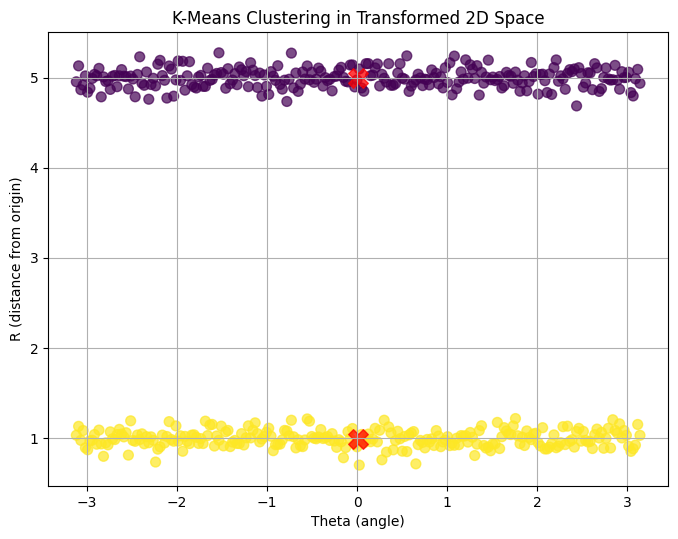

In [15]:
# 변환된 2D 데이터(theta, r)에 K-means 적용
# np.c_는 theta와 r 배열을 열 기준으로 합쳐 (500, 2) 크기의 배열을 만듭니다.
X_polar = np.c_[theta_polar, r_polar]
kmeans_success = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0)
y_kmeans_success = kmeans_success.fit_predict(X_polar)

# 변환된 공간에서 클러스터링 결과 시각화
plt.figure(figsize=(8, 8))
plt.scatter(theta_polar, r_polar, c=y_kmeans_success, s=50, cmap='viridis', alpha=0.7)
centers_polar = kmeans_success.cluster_centers_
plt.scatter(centers_polar[:, 0], centers_polar[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title('K-Means Clustering in Transformed 2D Space')
plt.xlabel('Theta (angle)')
plt.ylabel('R (distance from origin)')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

### 3.4. 원본 좌표계에 결과 시각화
마지막으로, 변환된 2D 공간에서 성공적으로 찾아낸 군집 레이블을 원본 (x, y) 좌표계의 데이터에 적용하여 시각화합니다.
Feature Transformation을 통해 K-means가 복잡한 데이터 구조를 성공적으로 학습할 수 있게 되었음을 확인할 수 있습니다.

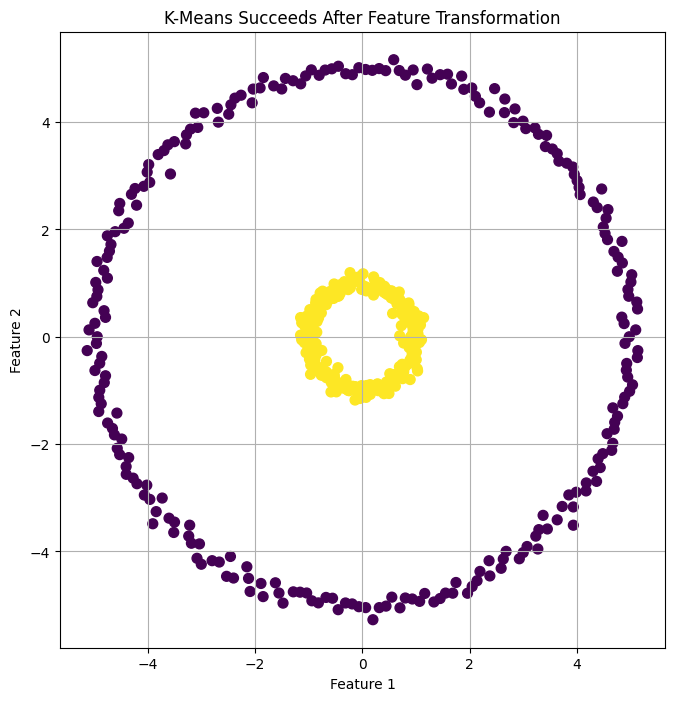

In [16]:
# 피처 변환 후 K-means가 성공적으로 분류한 결과를 원본 데이터에 시각화합니다.
plt.figure(figsize=(8, 8))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_success, s=50, cmap='viridis')
plt.title('K-Means Succeeds After Feature Transformation')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

## 4. 최소제곱 데이터 피팅 (Least Squares Data Fitting)
최소제곱법은 모델의 예측값과 실제 데이터 값 사이의 오차(잔차)의 제곱합을 최소화하는 모델 파라미터를 찾는 방법입니다.
데이터에 가장 잘 맞는 모델을 찾기 위해 사용되며, 특히 선형 회귀 분석 (Linear Regression)의 핵심 원리입니다.

### 4.1. 정규방정식을 이용한 직선 피팅
최소제곱법의 해 $\hat{\boldsymbol{\theta}}$는 이론적으로 정규방정식(Normal Equation)을 통해 구할 수 있습니다.

$$ (A^T A)\hat{\boldsymbol{\theta}} = A^T \mathbf{y} $$

이 방정식은 설계 행렬 $A$의 열들이 서로 선형 독립(linearly independent)일 때, 역행렬을 이용하여 아래와 같이 풀 수 있습니다.

$$ \hat{\boldsymbol{\theta}} = (A^T A)^{-1} A^T \mathbf{y} $$

먼저, 이 정규방정식이 잘 동작하는 간단한 직선 피팅 문제에 적용해 보겠습니다.

정규방정식으로 찾은 파라미터: [2.0503 3.1492]
실제 파라미터: [2.0, 3.0]


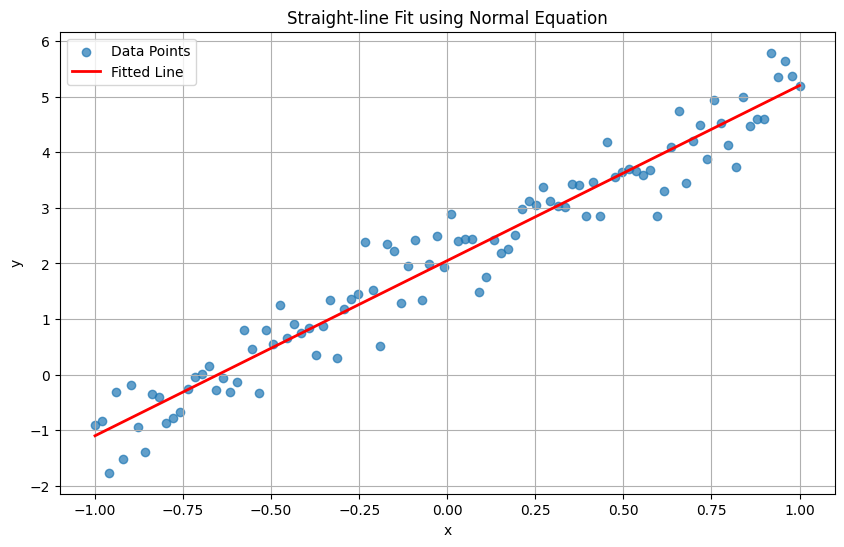

In [17]:
# 직선 피팅에 사용할 데이터 생성 및 설계 행렬 구성

# 실습: 아래 true_theta_0, true_theta_1 값을 바꾸어가며 직선의 형태와 피팅 결과가 어떻게 변하는지 확인해보세요.
true_theta_0 = 2.0  # 실제 절편 (y = theta_0 + theta_1 * x)
true_theta_1 = 3.0  # 실제 기울기

num_data_points = 100
x_data = np.linspace(-1, 1, num_data_points)
# 정의된 변수를 사용하여 y 데이터 생성
y_data = true_theta_0 + true_theta_1 * x_data + np.random.normal(0, 0.5, size=x_data.shape)
A_line = np.c_[np.ones(num_data_points), x_data]

# 정규방정식을 이용해 파라미터 계산
# A_line의 두 열(상수항, x항)은 선형 독립이므로 이 방법이 잘 동작합니다.
A_T_A = A_line.T @ A_line
A_T_y = A_line.T @ y_data
theta_hat = np.linalg.inv(A_T_A) @ A_T_y

print(f"정규방정식으로 찾은 파라미터: {np.round(theta_hat, 4)}")
print(f"실제 파라미터: [{true_theta_0}, {true_theta_1}]")

# 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(x_data, y_data, label='Data Points', alpha=0.7)
plt.plot(x_data, A_line @ theta_hat, color='red', linewidth=2, label='Fitted Line')
plt.title('Straight-line Fit using Normal Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### 4.2. 정규방정식의 한계: 고차 다항식 피팅
정규방정식은 직선과 같이 단순한 모델에서는 잘 동작했습니다. 이번에는 더 복잡한 데이터 패턴을 학습하기 위해, 같은 방법(정규방정식)을 고차 다항식 모델에 적용해 보겠습니다.

과연 어떤 결과가 나올까요?

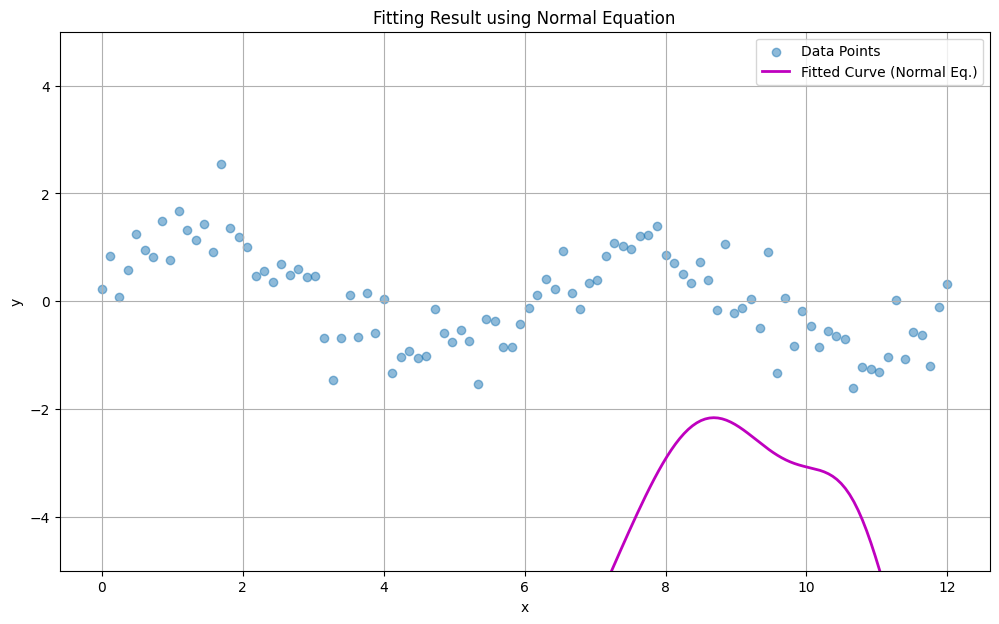

In [18]:
# 고차 다항식 피팅을 위한 데이터 생성 및 설계 행렬 구성
num_points = 100
x_poly = np.linspace(0, 12, num_points)
y_poly = np.sin(x_poly) + np.random.normal(0, 0.5, num_points)

# 실습: degree 값을 5, 10, 20 등으로 바꿔보며 피팅 결과가 어떻게 달라지는지 확인해보세요.
degree = 15
# np.vander는 [x^n, x^(n-1), ..., 1] 순서의 행렬을 생성합니다.
# np.fliplr를 사용해 열의 순서를 뒤집어 [1, x, x^2, ..., x^n] 형태로 만들어 모델의 계수(theta)와 순서를 일치시킵니다.
A_poly_high_degree = np.fliplr(np.vander(x_poly, degree + 1))

# 정규방정식을 이용해 파라미터 계산 시도
A_T_A_poly = A_poly_high_degree.T @ A_poly_high_degree
theta_hat_poly_normal = np.linalg.inv(A_T_A_poly) @ (A_poly_high_degree.T @ y_poly)

# 계산된 파라미터로 피팅 결과 시각화
x_fit_curve = np.linspace(0, 12, 200)
A_fit_curve = np.fliplr(np.vander(x_fit_curve, degree + 1))
y_fit_normal = A_fit_curve @ theta_hat_poly_normal

plt.figure(figsize=(12, 7))
plt.scatter(x_poly, y_poly, label='Data Points', alpha=0.5)
plt.plot(x_fit_curve, y_fit_normal, color='m', linewidth=2, label='Fitted Curve (Normal Eq.)')
plt.title('Fitting Result using Normal Equation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-5, 5)
plt.show()

#### 원인 진단: 왜 그래프가 비정상적으로 그려졌을까?

앞선 그래프는 데이터의 패턴을 전혀 따르지 못하고 극단적으로 발산하는 모습을 보입니다. 계산 자체는 오류 없이 완료되었지만, 결과는 완전히 틀렸습니다.

그 원인은 정규방정식의 핵심인 $(A^T A)$ 행렬의 역행렬을 구하는 과정의 불안정성에 있습니다. 고차 다항식 모델에서는 설계 행렬 $A$의 열들이 서로 너무 비슷해져서, 열들이 선형 독립 조건을 거의 만족하지 못하게 됩니다. 이런 행렬을 ill-conditioned matrix(조건이 나쁜 행렬)라고 부릅니다.

이런 행렬의 역행렬을 계산하면 작은 오차도 매우 크게 증폭되어, 결국 신뢰할 수 없는 엉뚱한 파라미터 값을 얻게 됩니다.

In [19]:
# 'A.T @ A' 행렬의 상태를 직접 확인해 봅시다.
# 행렬의 안정성을 나타내는 조건수(condition number)를 계산합니다.
cond_num = np.linalg.cond(A_T_A_poly)

print(f"A.T @ A 행렬의 조건수(condition number): {cond_num:.2e}")

A.T @ A 행렬의 조건수(condition number): 3.88e+32


조건수가 매우 큰 값이라면, 해당 행렬은 수치적으로 매우 불안정하여 역행렬 계산 결과를 신뢰할 수 없음을 의미합니다.

### 4.3. lstsq를 이용한 해결과 과적합 문제
이러한 불안정성 문제를 해결하기 위해, np.linalg.lstsq는 역행렬을 직접 계산하지 않고 수치적으로 안정된 방법을 사용하여 파라미터를 찾습니다.
lstsq를 사용하면 고차 다항식 모델도 안정적으로 피팅할 수 있습니다. 하지만, 이는 또 다른 문제인 과적합(Overfitting)으로 이어집니다.

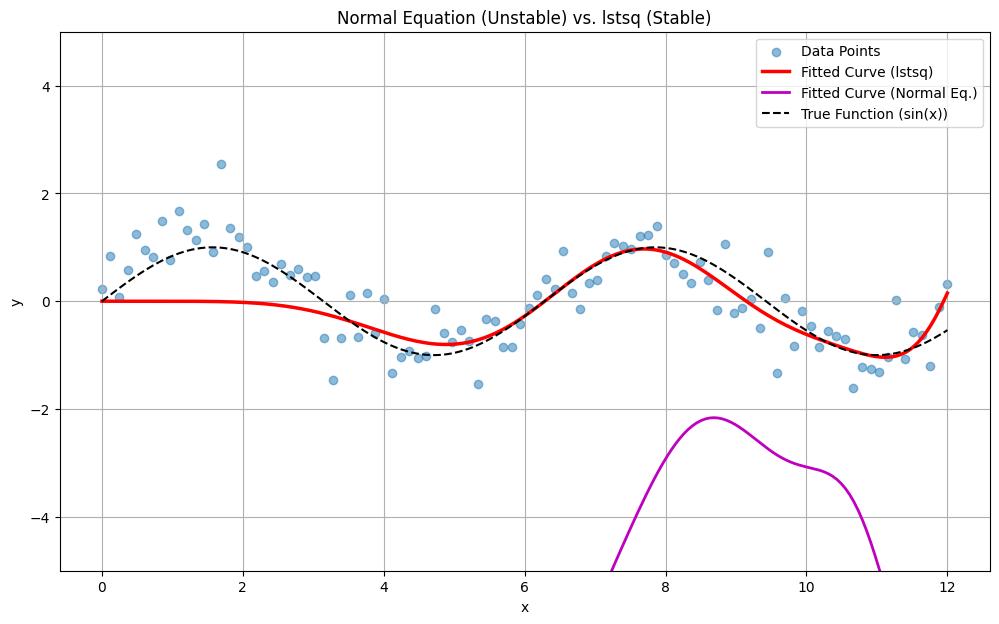

In [20]:
# lstsq 함수로 고차 다항식 문제 풀이
theta_hat_poly_lstsq, _, _, _ = np.linalg.lstsq(A_poly_high_degree, y_poly, rcond=None)
y_fit_lstsq = A_fit_curve @ theta_hat_poly_lstsq

# 정규방정식 결과와 lstsq 결과 비교 시각화
plt.figure(figsize=(12, 7))
plt.scatter(x_poly, y_poly, label='Data Points', alpha=0.5, zorder=1)
plt.plot(x_fit_curve, y_fit_lstsq, color='red', linewidth=2.5, label='Fitted Curve (lstsq)', zorder=3)
plt.plot(x_fit_curve, y_fit_normal, color='m', linewidth=2, label='Fitted Curve (Normal Eq.)', zorder=2)
plt.plot(x_fit_curve, np.sin(x_fit_curve), 'k--', label='True Function (sin(x))', zorder=4)

plt.title(f'Normal Equation (Unstable) vs. lstsq (Stable)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-5, 5)
plt.show()

#### 그래프 분석
- lstsq (빨간색 실선): 정규방정식과 달리, 수치적으로 안정적인 해를 찾아내어 데이터 포인트를 잘 따라가는 곡선을 그립니다.
- 정규방정식 (자주색 점선): 수치적 불안정성으로 인해 완전히 잘못된 결과를 보여줍니다.
- 문제점: 비록 lstsq가 안정적인 해를 찾았지만, 이 15차 다항식 곡선은 실제 함수(검은색 점선)보다 훨씬 복잡하고 구불구불합니다. 이것이 바로 과적합(Overfitting)입니다. 모델이 데이터의 근본적인 추세뿐만 아니라, 불필요한 노이즈까지 학습했기 때문입니다.

### 4.4. 모델 복잡도 선택을 위한 검증
과적합 문제를 해결하고 최적의 모델 복잡도(차수)를 찾기 위해, 데이터를 훈련(training) 세트와 테스트(test) 세트로 나누어 모델을 검증합니다.

- 훈련 오차: 모델이 학습 데이터를 얼마나 잘 설명하는지 나타냅니다.
- 테스트 오차: 모델이 보지 못한 새로운 데이터를 얼마나 잘 예측하는지 나타내는 일반화 성능의 척도입니다.

우리의 목표는 테스트 오차를 가장 낮게 만드는 모델을 찾는 것입니다.

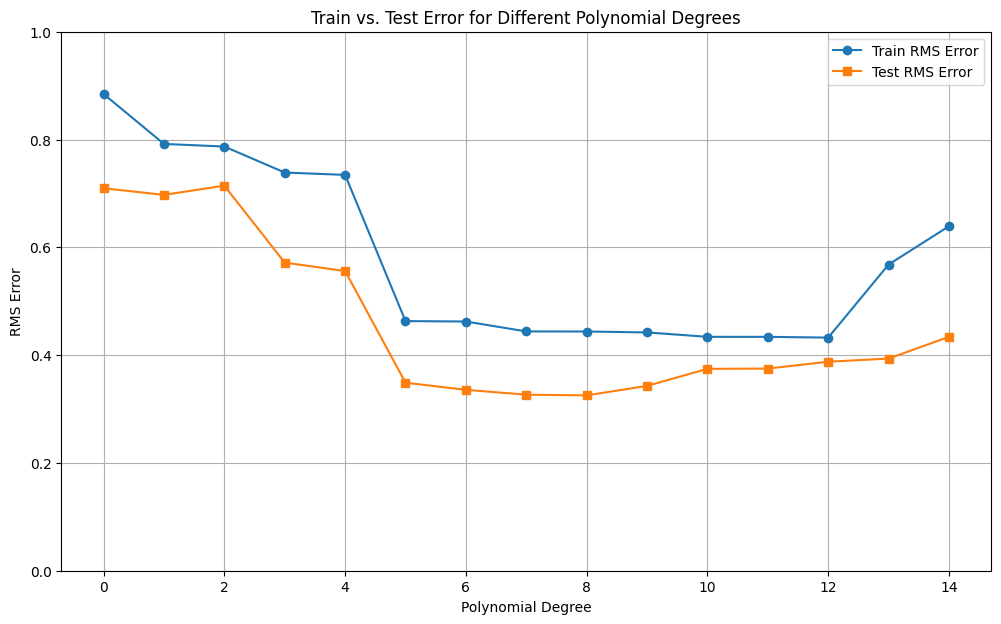


분석 결과: 테스트 오차가 가장 낮은 최적의 차수는 8 입니다 (이때의 Test Error: 0.3253).


In [21]:
# 데이터를 훈련(train) 세트와 테스트(test) 세트로 분할
# 실습: train_ratio 값을 0.5, 0.8 등으로 바꾸어 보며 훈련 데이터의 양이 오차 그래프에 미치는 영향을 확인해보세요.
train_ratio = 0.9
split_index = int(num_points * train_ratio)

shuffled_indices = np.random.permutation(num_points)
train_indices = shuffled_indices[:split_index]
test_indices = shuffled_indices[split_index:]

x_train, y_train = x_poly[train_indices], y_poly[train_indices]
x_test, y_test = x_poly[test_indices], y_poly[test_indices]

# 다양한 차수에 대해 모델 훈련 및 오차 계산
degrees = range(0, 15)
train_errors = []
test_errors = []

def rms_error(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred)**2))

for d in degrees:
    A_train = np.fliplr(np.vander(x_train, d + 1))
    theta_hat, _, _, _ = np.linalg.lstsq(A_train, y_train, rcond=None)

    y_train_pred = A_train @ theta_hat

    A_test = np.fliplr(np.vander(x_test, d + 1))
    y_test_pred = A_test @ theta_hat

    train_errors.append(rms_error(y_train, y_train_pred))
    test_errors.append(rms_error(y_test, y_test_pred))

# 차수에 따른 훈련/테스트 오차 변화 시각화
plt.figure(figsize=(12, 7))
plt.plot(degrees, train_errors, 'o-', label='Train RMS Error')
plt.plot(degrees, test_errors, 's-', label='Test RMS Error')
plt.title('Train vs. Test Error for Different Polynomial Degrees')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMS Error')
plt.legend()
plt.grid(True)
plt.ylim(0, 1)
plt.xticks(degrees[::2])
plt.show()

# 테스트 오차가 가장 낮은 최적의 차수와 해당 오차를 찾습니다.
best_degree_index = np.argmin(test_errors)
best_degree = degrees[best_degree_index]
min_test_error = test_errors[best_degree_index]

print(f"\n분석 결과: 테스트 오차가 가장 낮은 최적의 차수는 {best_degree} 입니다 (이때의 Test Error: {min_test_error:.4f}).")

### 4.5. 최적 모델을 이용한 최종 피팅 결과
앞선 오차 그래프를 통해, 테스트 오차(Test Error)가 가장 낮아지는 지점이 우리 모델의 최적의 복잡도(차수)임을 확인했습니다.

이제 이 최적의 차수를 사용하여 최종 모델을 학습시키고, 그 결과가 실제 함수를 얼마나 잘 근사하는지 시각적으로 확인해 보겠습니다.

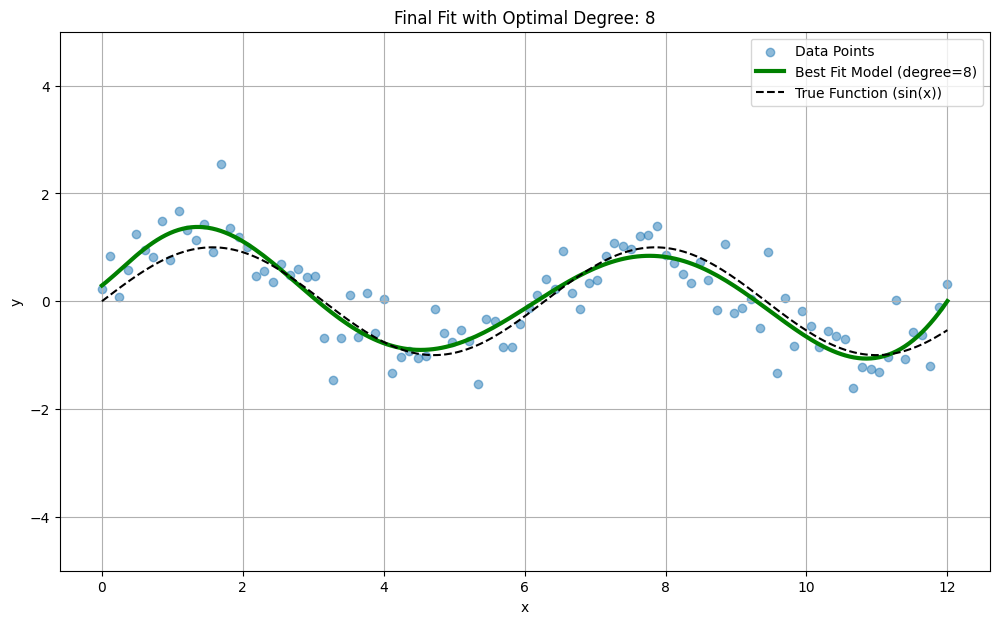

In [22]:
# 최적의 차수를 사용하여 전체 데이터로 최종 모델 재학습
A_final = np.fliplr(np.vander(x_poly, best_degree + 1))
theta_final, _, _, _ = np.linalg.lstsq(A_final, y_poly, rcond=None)

# 최적 모델의 피팅 결과 시각화
x_fit_curve = np.linspace(0, 12, 200)
A_fit_final = np.fliplr(np.vander(x_fit_curve, best_degree + 1))
y_fit_final = A_fit_final @ theta_final

plt.figure(figsize=(12, 7))
plt.scatter(x_poly, y_poly, label='Data Points', alpha=0.5, zorder=1)
plt.plot(x_fit_curve, y_fit_final, color='g', linewidth=3, label=f'Best Fit Model (degree={best_degree})', zorder=2)
plt.plot(x_fit_curve, np.sin(x_fit_curve), 'k--', label='True Function (sin(x))', zorder=3)

plt.title(f'Final Fit with Optimal Degree: {best_degree}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.ylim(-5, 5)
plt.show()